# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()
print(df['title_length'])

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media_title = (df['title_length'].mean())
median_title = (df['title_length'].median())
mode_title = df['title_length'].mode()[0]

print(media_title)
print(median_title)
print(mode_title)

15.481103166496425
14.0
12


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
print(rango)

varianza = round(df['title_length'].var(),2)
print(varianza)

dev_std = round(df['title_length'].std(),2)
print(dev_std)

67
72.11
8.49


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = round(df['title_length'].skew(),2)
print(asimetria)

kurtosis = round(df['title_length'].kurtosis(),2)
print(kurtosis)

1.53
3.81


In [6]:
# Imprime el título más corto y el título más largo según su longitud
large_title = df['title_length'].idxmax() #Seleccionamos el índice cuyo valor sea máximo.
large_title_length =df.loc[large_title, 'title_length'] #Obtenemos el valor de los caracteres del título correspondiente al índice anterior
name_large_title = df.loc[large_title, 'title'] #Obtenemos el titulo de ese valor obtenido.
print(large_title_length)
print(f'La película cuyo título es más largo es: {name_large_title} con {large_title_length} caracteres')

small_title = df['title_length'].idxmin() #seleccionamos el índice de la fila en la que el valor es el mínimo
small_title_length = df.loc[small_title, 'title_length'] #valor de la longitud del titulo a partir del índice anterior
name_small_title = df.loc[small_title, 'title'] 

print(small_title_length)
print(f'La película cuyo título es más corto es: {name_small_title} con {small_title_length} caracteres')

68
La película cuyo título es más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb con 68 caracteres
1
La película cuyo título es más corto es: M con 1 caracteres


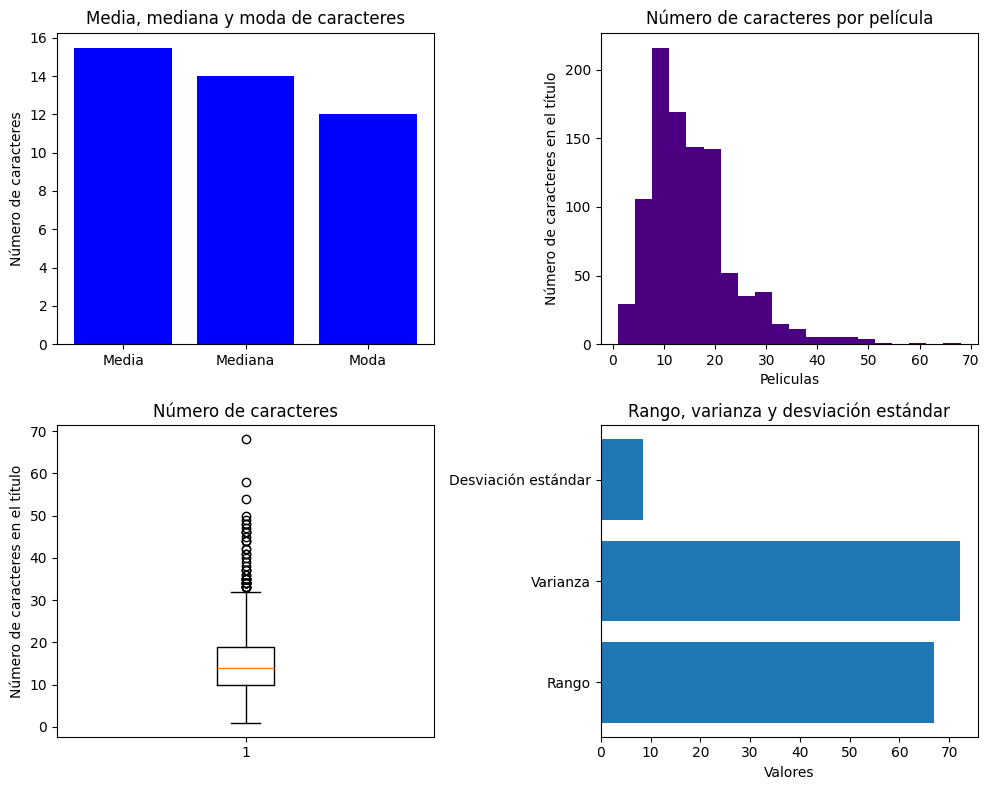

In [7]:
# grafica tus resultados

#Creamos subplot para cada una de ellas
fig, axes = plt.subplots(2,2, figsize =(10,8))

etiquetas = ['Media', 'Mediana','Moda'] #Datos para el primer gráfico de barras
valores = [media_title, median_title, mode_title]

etiquetas2 = ['Rango', 'Varianza', 'Desviación estándar'] #Datos para el segundo gráfico de barras
valores2 = [rango, varianza, dev_std]

axes[0,0].bar(etiquetas, valores, color = 'blue')
axes[0,0].set_title('Media, mediana y moda de caracteres')
axes[0, 0].set_ylabel('Número de caracteres')

axes[0,1].hist(df['title_length'], bins=20, color ='indigo')
axes[0,1].set_title('Número de caracteres por película')
axes[0,1].set_xlabel('Peliculas')
axes[0,1].set_ylabel('Número de caracteres en el título')

axes[1,0].boxplot(df['title_length'])
axes[1,0].set_title('Número de caracteres')
axes[1,0].set_ylabel('Número de caracteres en el título')

axes[1,1].barh(etiquetas2, valores2)
axes[1,1].set_title('Rango, varianza y desviación estándar')
axes[1,1].set_xlabel('Valores')

plt.tight_layout()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [8]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

lista = df['title_length'].iloc[3:8] #Creamos lista a parti de 5 valores del df.
lista_real = lista.tolist() #Convertimos datos en lista
print(lista_real)

[15, 12, 12, 30, 45]


In [9]:
# Calcula la media de los 5 valores
media = lista.mean()
print(media)

22.8


In [10]:
# Calcula las diferencias al cuadrado con respecto a la media
suma_de_cuadrados = 0 #creamos una variable para acumular la suma de cuadrados obtenidos

for valor in lista_real: #Creación de un loop para restar cada valor de la lista con la media y sumarlos al cuadrado.
    diferencia = valor - media
    suma_de_cuadrados = suma_de_cuadrados + diferencia ** 2

print(suma_de_cuadrados)

838.8


In [11]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = suma_de_cuadrados/len(lista_real) 
desviacion_std = round(math.sqrt(varianza),2)
print(varianza)
print(f'La desviación de la lista creada es de: {desviacion_std}')

167.76
La desviación de la lista creada es de: 12.95
